In [1]:
import sys, os
import numpy as np
import time
from scipy.spatial.distance import pdist
import itertools as it
import matplotlib
#matplotlib.use('Qt5Agg')
%matplotlib notebook
#import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from collections import namedtuple, deque
from matplotlib.backend_bases import NavigationToolbar2, Event
#from inotifications import AudioNotifier
np.core.arrayprint._line_width = 120

%load_ext autoreload
%autoreload 2
%aimport simulation
%aimport stats
%aimport forces
%aimport lab_setup
from simulation import *
from stats import *
from forces import *
from lab_setup import *

In [8]:
"""
Considerations:
- are the atoms isotope specific -> adjust masses
- fix natural line widths
- add full electronic state profiles - multistep cooling, metastable states
- improve electric field approximation - not just infinite planes
"""
pass

# simulation parameters
Frame_info = namedtuple('Frame_Info', ['start', 'stop','print_step'])


In [9]:
# Reset

sim_params = {'trap' : UW_Trap, #Georgia_Tech_2007, #My_Trap, 
              'atoms' : [Barium]*2, 
              'forces' : [E_Field, Coulomb_Repulsion], # Laser_Cooling
              'timestep' : (1. / UW_Trap.w_E / (np.e * 15)), # divide by irrational number to sample all parts of cycle
              'init_setting' : temp_setting,
             }

traj = Trajectory(name='testing', sim_parameters=sim_params, stats=[Temperature(), Energy()])

print('Timestep:', traj.sim.timestep, 's')


Timestep: 2.1446824734182845e-10 s


In [10]:
#traj.name = '_'.join(['ba' if x == Barium else 'yb' for x in sim_params['atoms']])
print('Name:', traj.name)
# if traj.sim.forces[1].no_cooling:
#     print('Cooling is off')
# else:
#     print('Cooling is on')

Name: testing


In [11]:
traj.sim.vel *= 0

In [12]:
print(traj.sim.pos)
print(traj.sim.vel)

[[  0.00000000e+00   0.00000000e+00   6.62180156e-06]
 [  0.00000000e+00   0.00000000e+00  -6.62180156e-06]]
[[-0. -0. -0.]
 [-0. -0.  0.]]


In [13]:

#frames = Frame_info(start=0,stop=2500000,print_step=500)
#frames = Frame_info(start=0,stop=5000000,print_step=500)
#frames = Frame_info(start=0,stop=2000000,print_step=500)
#frames = Frame_info(start=0,stop=500000,print_step=500)
frames = Frame_info(start=0,stop=500*100,print_step=500)
frames = Frame_info(start=0,stop=10,print_step=1)

traj.print_step = frames.print_step

tick = time.clock()

traj.run(frames.stop)

tock = time.clock()

print()
fps = (frames.stop-frames.start)/(tock - tick)
print('Run complete, rate:', fps, 'fps', fps * traj.sim.timestep*1e9, 'ns/s')

#notifier.notify()


0.0
0
[[       0.                0.         -5768260.27624905]
 [       0.                0.          5768260.27624905]]
10.0
2.1446824734182845e-10
[[       0.                0.         -5768260.27624905]
 [       0.                0.          5768260.27624905]]
20.0
4.289364946836569e-10
[[       0.                0.         -5768259.35176474]
 [       0.                0.          5768259.35176474]]
30.0
6.434047420254853e-10
[[       0.                0.         -5768257.50279595]
 [       0.                0.          5768257.50279595]]
40.0
8.578729893673138e-10
[[       0.               0.        -5768254.7293425]
 [       0.               0.         5768254.7293425]]
50.0
1.0723412367091422e-09
[[       0.                0.         -5768251.03140419]
 [       0.                0.          5768251.03140419]]
60.0
1.2868094840509706e-09
[[       0.                0.         -5768246.40898078]
 [       0.                0.          5768246.40898078]]
70.0
1.501277731392799e-09
[[ 

In [66]:
traj.pos

[array([[ 0.00000000e+00,  0.00000000e+00,  6.62180156e-06],
        [ 0.00000000e+00,  0.00000000e+00, -6.62180156e-06]]),
 array([[ 0.00000000e+00,  0.00000000e+00,  6.62180156e-06],
        [ 0.00000000e+00,  0.00000000e+00, -6.62180156e-06]]),
 array([[ 0.00000000e+00,  0.00000000e+00,  6.62180129e-06],
        [ 0.00000000e+00,  0.00000000e+00, -6.62180129e-06]]),
 array([[ 0.00000000e+00,  0.00000000e+00,  6.62180076e-06],
        [ 0.00000000e+00,  0.00000000e+00, -6.62180076e-06]]),
 array([[ 0.00000000e+00,  0.00000000e+00,  6.62179996e-06],
        [ 0.00000000e+00,  0.00000000e+00, -6.62179996e-06]]),
 array([[ 0.0000000e+00,  0.0000000e+00,  6.6217989e-06],
        [ 0.0000000e+00,  0.0000000e+00, -6.6217989e-06]]),
 array([[ 0.00000000e+00,  0.00000000e+00,  6.62179758e-06],
        [ 0.00000000e+00,  0.00000000e+00, -6.62179758e-06]]),
 array([[ 0.00000000e+00,  0.00000000e+00,  6.62179599e-06],
        [ 0.00000000e+00,  0.00000000e+00, -6.62179599e-06]]),
 array([[ 0.00

In [60]:
traj.vel

[array([[ 0., -0., -0.],
        [ 0.,  0., -0.]]), array([[ 0.        ,  0.        , -0.00061855],
        [ 0.        ,  0.        ,  0.00061855]]), array([[ 0.        ,  0.        , -0.00185566],
        [ 0.        ,  0.        ,  0.00185566]]), array([[ 0.        ,  0.        , -0.00309277],
        [ 0.        ,  0.        ,  0.00309277]]), array([[ 0.        ,  0.        , -0.00432988],
        [ 0.        ,  0.        ,  0.00432988]]), array([[ 0.        ,  0.        , -0.00556699],
        [ 0.        ,  0.        ,  0.00556699]]), array([[ 0.        ,  0.        , -0.00680409],
        [ 0.        ,  0.        ,  0.00680409]]), array([[ 0.       ,  0.       , -0.0080412],
        [ 0.       ,  0.       ,  0.0080412]]), array([[ 0.        ,  0.        , -0.00927831],
        [ 0.        ,  0.        ,  0.00927831]]), array([[ 0.        ,  0.        , -0.01051541],
        [ 0.        ,  0.        ,  0.01051541]])]

In [42]:
traj.times

[0,
 2.1446824734182845e-10,
 4.289364946836569e-10,
 6.434047420254853e-10,
 8.578729893673138e-10,
 1.0723412367091422e-09,
 1.2868094840509706e-09,
 1.501277731392799e-09,
 1.7157459787346276e-09,
 1.930214226076456e-09]

In [24]:
# toggle cooling:
def toggle_cooling():
    traj.sim.forces[1].no_cooling |= True
    if traj.sim.forces[1].no_cooling:
        print 'Cooling is now off'
    else:
        print 'Cooling is now on'
        
toggle_cooling()

Cooling is now off


In [47]:
# temporarily save temperatures
#full_temp = traj.stats['temp'].get_data().copy()
#full_time = np.array(traj.times)
#np.save('temp_times', full_time)
#np.save('temp_temp', full_temp)

<IPython.core.display.Javascript object>


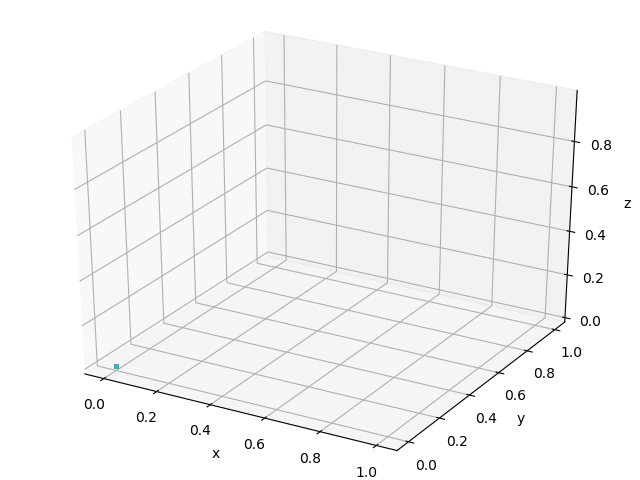

In [50]:
# Plot Traj
plotter = traj.plot_traj(animated=False)
plt.show()

In [81]:
traj.sim.vel = np.zeros(traj.sim.vel.shape)
print 'vel zeroed'

vel zeroed


In [29]:
def crop(traj, crop_frames, start=True):
    print 'Before', len(traj.times)
    if not start:
        l = len(traj.times)
        traj.pos = traj.pos[:l-crop_frames]
        traj.vel = traj.vel[:l-crop_frames]
        for _ in range(crop_frames):
            traj.stats['temp']._data.pop()
            traj.stats['energy']._data.pop()
        traj.times = traj.times[:l-crop_frames]
        print 'After', len(traj.times)
        return
    traj.pos = traj.pos[crop_frames:]
    traj.vel = traj.vel[crop_frames:]
    for _ in range(crop_frames):
        traj.stats['temp']._data.popleft()
        traj.stats['energy']._data.popleft()
    traj.times = traj.times[crop_frames:]
    print 'After', len(traj.times)

#crop(traj, 6000, start=False)

Before 10000
After 4000


In [61]:
print 'time', traj.times[-1] - traj.times[0]
print 'frames', len(traj.pos)
try:
    print 'events', traj.sim.photon_events
except:
    pass

time 0.000162459697361
frames 1516
events [[ 2584.  2489.  2160.  2568.  2582.  2106.]
 [ 2771.  2562.  2211.  2704.  2553.  2022.]
 [ 2697.  2601.  2119.  2733.  2571.  2147.]
 [ 2701.  2653.  2299.  2784.  2571.  2322.]
 [ 2718.  2600.  2136.  2779.  2542.  2236.]
 [ 2754.  2594.  2133.  2786.  2741.  2215.]
 [ 2666.  2585.  2237.  2674.  2612.  2177.]
 [ 2735.  2647.  2089.  2746.  2597.  2193.]
 [ 2811.  2611.  2188.  2657.  2565.  2230.]
 [ 2762.  2568.  2188.  2810.  2652.  2204.]
 [ 2773.  2617.  2219.  2798.  2554.  2139.]
 [ 2693.  2535.  2101.  2725.  2597.  2191.]
 [ 2661.  2650.  2148.  2744.  2571.  2194.]
 [ 2800.  2512.  2173.  2743.  2580.  2195.]
 [ 2674.  2598.  2173.  2731.  2644.  2051.]
 [ 2779.  2625.  2179.  2719.  2636.  2220.]
 [ 2699.  2540.  2243.  2813.  2552.  2197.]
 [ 2759.  2635.  2210.  2634.  2633.  2055.]
 [ 2698.  2539.  2189.  2741.  2597.  2093.]
 [ 2574.  2425.  2153.  2496.  2537.  2081.]]


In [84]:
traj.plot_stats('temp')
temps = traj.stats['temp'].get_data()
mu, sigma = temps.mean(), temps.std()
cooling_limit = traj.stats['temp'].level
print 'Temp:', mu, '+/-', sigma, 'K'
print 'Cooling Limit:', cooling_limit, 'K'
print 'Error:', 100 * np.abs(mu-cooling_limit)/mu, '%'
plt.show()

Temp: 1.64939868057 +/- 1.22037744095 K
Cooling Limit: 0.000359943349666 K
Error: 99.9781772986 %


In [9]:
traj.plot_stats('energy')
plt.show()

In [14]:
#print traj.calc_pos_means()
coords = np.vstack([r[:,2] for r in traj.pos])
print coords.mean(0)

[ -1.19906589e-05  -3.79159576e-06   3.79134593e-06   1.19909239e-05]


In [32]:
print traj.name

yb_ba_ba_yb


In [33]:
try:
    os.mkdir(traj.name)
except:
    pass

In [34]:
show_pos = True
save = True
sep = True # always for saving
assert not save or sep, 'Can\' t save combined graphs'
traj.plot_motion(axis=0, show_pos=show_pos, separate_plots=sep, save=save) # X
traj.plot_motion(axis=1, show_pos=show_pos, separate_plots=sep, save=save) # Y
traj.plot_motion(axis=2, show_pos=show_pos, separate_plots=sep, save=save) # Z
plt.show()

Max at (kHz):
	 ion 0 573.654884742
	 ion 1 760.209318804
	 ion 2 760.209318804
	 ion 3 573.654884742
saved to yb_ba_ba_yb/
Max at (kHz):
	 ion 0 837.163022855
	 ion 1 1014.38973521
	 ion 2 1014.38973521
	 ion 3 837.163022855
saved to yb_ba_ba_yb/
Max at (kHz):
	 ion 0 326.470259609
	 ion 1 326.470259609
	 ion 2 326.470259609
	 ion 3 326.470259609
saved to yb_ba_ba_yb/


In [18]:
traj.save_xyz_file(traj.name + '/')

ba_yb_yb_ba/ba_yb_yb_ba.xyz saved


In [18]:
traj.save_state()

PicklingError: Can't pickle <function temp_setting at 0x7f32359432a8>: it's not the same object as simulation.temp_setting

In [63]:
#traj.sim.trap

In [ ]:
"""ignore"""

"""class Ion_Trap:
    def __init__(self, w_E, V_0, V_dc, V_caps, trap_X_length, trap_Y_length, trap_Z_length):
        self.w_E = w_E # electric field frequency
        self.V_0 = V_0 # radial voltage amplitude
        self.V_dc = V_dc # radial voltage offset
        self.V_caps = V_caps # axial voltage (dc)
        self.trap_X = trap_X_length / 2. # radius in X direction
        self.trap_Y = trap_Y_length / 2. # radius in Y direction
        self.trap_Z = trap_Z_length / 2. # radius in Z direction (axial)"""

"""
class Barium:#(Atom):
    def __init__(self):
        self.name = 'Barium'
        self.symbol = 'Ba'
        self.number = 56
        self.mass = 137.327 * amu2kg
        self.charge = e
        self.natural_line_width = 2 * np.pi * 40e6 # 40 MHz
        self.cooling_laser_wavelength = 493.4e-9 # m - 493 nm laser
        self.rabi_frequency = 10.1e6 # Hz - from 2009 paper # MISSING
        
class Ytterbium:
    def __init__(self):
        self.name = 'Ytterbium'
        self.symbol = 'Yb'
        self.number = 70
        self.mass = 173.04 * amu2kg
        self.charge = e
        self.natural_line_width = 2 * np.pi * 40e6 # 40 MHz
        self.cooling_laser_wavelength = 369e-9 # m - 369 nm laser
        self.rabi_frequency = -1 # MISSING
"""
pass

<IPython.core.display.Javascript object>


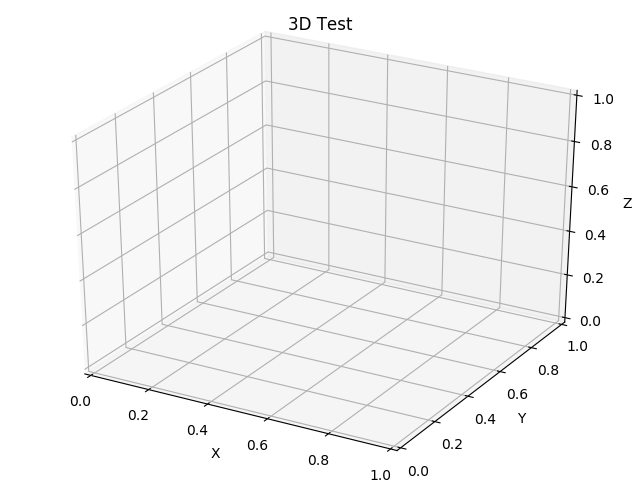

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(plotter.fig, update_lines, plotter.data.shape[-1],
                                   interval=50, blit=False)

plt.show()

In [16]:
print plotter.fig, plotter.update, plotter.data.shape[-1]

Figure(640x480) <bound method Plotter.update of <simulation.Plotter instance at 0x7f9d6806acf8>> 10
